In [2]:
import matplotlib.pyplot as plt
import pandas as pd #for data loading, analysis and manipulation
import matplotlib as mpl #for data visualization
import seaborn as sns; sns.set() #for fast and powerful data visualiation
import numpy as np #for numerical analysis
%matplotlib inline



# The following is analysis of the first data frame
(not used in the final product)

In [2]:

df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

i=0
ppl=0
num=len(df["heart_disease"])

hd=list(df["heart_disease"])
h=list(df["hypertension"])

while i < num:
  if hd[i]==0 and h[i]==1:
    ppl+=1
  i+=1

print(ppl)

434


Correlation between **heart disease** and **hypertension**:

212/5110 have heart disease but not hypertension

64/5110 have heart disease and hypertension

434/5110 dont have heart disease but do have hypertension

4400/5110 dont have heart disease or hypertension

In [3]:
g= list(df["gender"])

ppl=0
i=0

while i < num:
  if g[i]=="Male" and h[i]==0:
    ppl+=1
  i+=1

print(ppl)

1893


**Gender** and **Heart Disease**

276/5110 are female with heart disease

2718/5110 are female without heart disease

222/5110 are male with heart disease

1893/5110 are male without heart disease


In [4]:
age= list(df['age'])

ppl=0
i=0
while i < num:
  if age[i]<50 and hd[i]==1:
    ppl+=1
  i+=1

print(ppl)

15


**Age** and **Heart disease**

1870 over 50 without heart disease

257 over 50 with heart disease

2885 under 50 without heart disease

15 under 50 with heart disease

In [5]:
healthy=0
under =0
over=0
obese=0

bmi= list(df["bmi"])
ppl=0
i=0

while i < num:
  if bmi[i]>=30 and hd[i]==1:
    obese+=1
  elif bmi[i] < 18.5 and hd[i]==1:
    under+=1
  elif bmi[i] <24.9 and hd [i]==1:
    healthy+=1
  elif bmi[i] < 29.9 and hd[i]==1:
    over+=1
  i+=1

print("underweight with heart disease:", under)
print("healthy with heart disease:", healthy)
print("overweight with heart disease:", over)
print("obese with heart disease:",obese)

underweight with heart disease: 0
healthy with heart disease: 31
overweight with heart disease: 92
obese with heart disease: 120


In [6]:
stroke = list(df["stroke"])
i=0
ppl=0
while i < num:
  if stroke[i]==0 and hd[i]==0:
    ppl+=1
  i+=1

print(ppl)


4632


**Stroke** and **heart disease**

47 stroke and heart disease
229 no stroke and heart disease


In [7]:

df= pd.read_csv("healthcare-dataset-stroke-data.csv")


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# __THE FOLLOWING IS FOR THE SECOND DATA SET__

In [3]:
df2=pd.read_csv("diabetes_data.csv")
print(df2)

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth 

Text(0, 0.5, 'Probability of Diabetes')

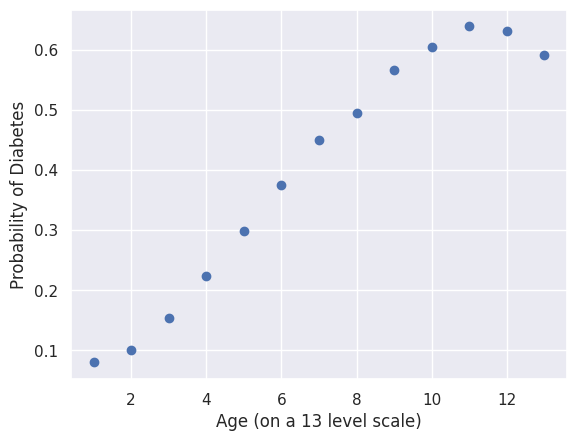

In [28]:
#first scatter w/o line of best fit
x=list(set(df2["Age"]))
y=df2.groupby(["Age"])["Diabetes"].mean()
plt.scatter (x,y)
plt.xlabel("Age (on a 13 level scale)")
plt.ylabel("Probability of Diabetes")


80
80


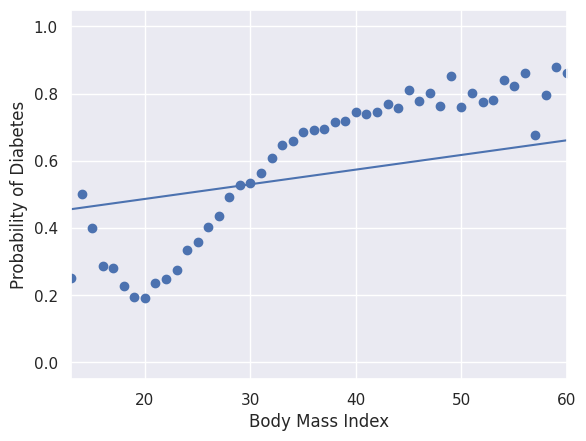

In [30]:
diabetes = np.array(df2["Diabetes"])
fig, ax = plt.subplots()
BMI = np.array(df2["BMI"])
BMI_unique_vals = np.array(list(set(BMI))) # list of bmi values without repeats
mean_values = df2.groupby('BMI')['Diabetes'].mean()
print(len(BMI_unique_vals))
print(len(mean_values))
slope, intercept = np.polyfit(BMI_unique_vals, mean_values, deg=1)

prediction = slope * BMI_unique_vals + intercept

ax.plot(BMI_unique_vals, prediction)
ax.scatter(BMI_unique_vals, mean_values)
plt.xlabel("Body Mass Index")
plt.ylabel("Probability of Diabetes")
plt.xlim([13,60])
plt.show()



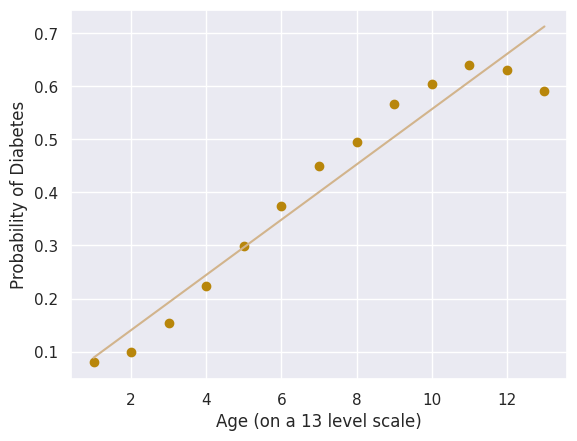

In [5]:

fig, ax = plt.subplots()
age = np.array(df2["Age"])
age_unique_vals = np.array(list(set(age))) # list of bmi values without repeats
mean_values = df2.groupby('Age')['Diabetes'].mean() #for each age find the mean probability of diabetes

slope, intercept = np.polyfit(age_unique_vals, mean_values, deg=1) #Overlay scatter plot and line of best fit

prediction = slope * age_unique_vals + intercept #line of best fit

#Plot
ax.plot(age_unique_vals, prediction, color="tan")
ax.scatter(age_unique_vals, mean_values, color = "darkgoldenrod")
plt.xlabel("Age (on a 13 level scale)")
plt.ylabel("Probability of Diabetes")
plt.show()


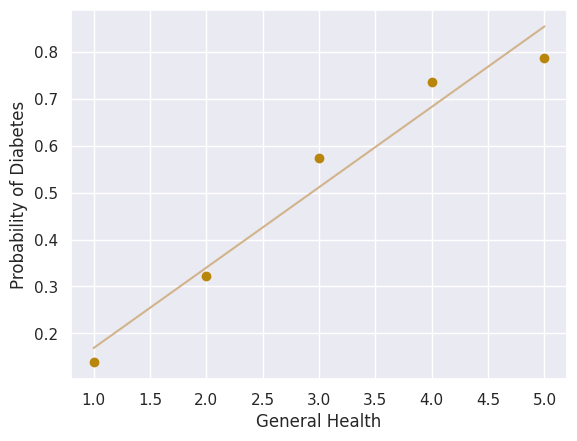

In [8]:

fig, ax = plt.subplots()
GenHlth = np.array(df2["GenHlth"])
GenHlth_unique_vals = np.array(list(set(GenHlth))) # list of bmi values without repeats
mean_values = df2.groupby('GenHlth')['Diabetes'].mean() #for each age find the mean probability of diabetes

slope, intercept = np.polyfit(GenHlth_unique_vals, mean_values, deg=1) #Overlay scatter plot and line of best fit

prediction = slope * GenHlth_unique_vals + intercept #line of best fit

#Plot
ax.plot(GenHlth_unique_vals, prediction, color="tan")
ax.scatter(GenHlth_unique_vals, mean_values, color = "darkgoldenrod")
plt.xlabel("General Health")
plt.ylabel("Probability of Diabetes")
plt.show()


In [19]:
df2.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# User Input Section/Diabetes Prediction


In [19]:


#Tried with heart disease but numbers were too low #sad
 #def binaryCalcHD (col):
  #i=0
  #ppl=0
  #tot=0
  #while i < num:
    #if col[i]==1.0:
      #tot+=1
    #if col[i]==1.0 and heartd[i]==1.0:
      #ppl+=1
    #i+=1
  #return ppl/total

num=len(df2["HeartDiseaseorAttack"])
hd=list(df2["HeartDiseaseorAttack"])
diab=list(df2["Diabetes"])
stroke=list(df2["Stroke"])
alch = list (df2["HvyAlcoholConsump"])
stroke=list(df2["Stroke"])
smoker = list (df2["Smoker"])


#Because many questions require yes or no answers,
# a binary calculator helps repetitive functions

def binaryCalc (col):
  i=0
  ppl=0
  tot=0
  while i < num:
    if col[i]==1.0:
      tot+=1
    if col[i]==1.0 and diab[i]==1.0:
      ppl+=1
    i+=1
  return ppl/tot


def ageCalc (col, age):
  i=0
  ppl=0
  tot=0
  while i < num:
    if col[i] < age and col[i] > age-4:
      tot+=1
    if col[i] < age and col[i] > age-4  and diab[i]==1.0:
      ppl+=1
    i+=1
  return ppl/tot

def bmiCalc(col, bmi):
  ppl=0
  i=0
  tot=0

  if bmi >= 30:
    while i < num:
      if col[i]>= 30:
        tot+=1
      if col[i]>= 30 and diab[i]==1:
        ppl+=1
      i+=1
  elif bmi < 18.5:
    while i < num:
      if col[i] < 18.5:
        tot+=1
      if col[i] < 18.5 and diab[i]==1:
        ppl+=1
      i+=1
  elif bmi < 24.9 and bmi > 18.6:
    while i < num:
      if col[i] < 24.9 and col[i] > 18.6:
        tot+=1
      if col[i] < 24.9 and col[i] > 18.6 and diab[i]==1:
        ppl+=1
      i+=1
  elif bmi < 29.9 and bmi > 25:
    while i < num:
      if col[i] < 29.9 and col[i] > 25:
        tot+=1
      if col[i] < 29.9 and col[i] > 25 and diab[i]==1:
        ppl+=1
      i+=1
  return ppl/tot

def genHealthCalc(col, health):
  ppl=0
  i=0
  tot=0

  if health == 5:
    while i < num:
      if col[i] == 5:
        tot+=1
      if col[i] == 5 and diab[i]==1:
        ppl+=1
      i+=1
  elif health == 4:
    while i < num:
      if col[i] == 4:
        tot+=1
      if col[i] == 4 and diab[i]==1:
        ppl+=1
      i+=1
  elif health == 3:
    while i < num:
      if col[i] == 3:
        tot+=1
      if col[i] == 3 and diab[i]==1:
        ppl+=1
      i+=1
  elif health == 2:
    while i < num:
      if col[i] == 2:
        tot+=1
      if col[i] == 2 and diab[i]==1:
        ppl+=1
      i+=1
  else:
    while i < num:
      if col[i] == 1:
        tot+=1
      if col[i] == 1 and diab[i]==1:
        ppl+=1
      i+=1
  return ppl/tot


In [20]:
from logging import error

print("What is your age?:")
iage=int(input())
print("Would you say that in general your health is: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor")
igenhealth=int(input())
print("Enter your BMI(integer):")
ibmi=int(input())
print("Ever had a stroke? (Y/N):")
istroke=input()
print("Are you a regular smoker? (Y/N):")
ismoker=input()
print("Do you have high cholesterol? (Y/N):")
ichol=input()
print("Do you have hypertension (high blood pressure)? (Y/N):")
ibp=input()


probability = 0

#Those who have suffered from a stroke:
if istroke == "Y" or istroke == 'y':
  probability += (binaryCalc(list(df2["Stroke"])))
#Heavy smokers:
if ismoker == "Y" or ismoker == 'y':
  probability += (binaryCalc(list(df2["Smoker"])))
#High Cholesterol:
if ichol == "Y" or ichol == 'y':
  probability += (binaryCalc(list(df2["HighChol"])))
#High Blood Pressure:
if ibp == "Y" or ibp == 'y':
  probability += (binaryCalc(list(df2["HighBP"])))
#Converting the 13 level age scale to normal:
if iage < 20:
  probability += ageCalc(list(df2["Age"]), 3)
elif iage < 40:
  probability += ageCalc(list(df2["Age"]),6)
elif iage < 60:
  probability += ageCalc(list(df2["Age"]), 9)
else:
  probability += ageCalc(list(df2["Age"]),13)
#BMI:
probability += bmiCalc(list(df2["BMI"]), ibmi)
#General Health:
probability += genHealthCalc(list(df2["GenHlth"]), igenhealth)

print("{:.1f}".format((probability/7)*100), "%")

if probability / 7 > 0.5:
  print("You have a very high probability of getting/having diabetes")
elif probability / 7 > 0.4:
  print("You have a high probability of getting/having diabetes")
elif probability / 7 > 0.3:
  print("You have a medium probability of getting/having diabetes")
elif probability / 7 > 0.2:
  print("You have a low probability of getting/having diabetes")
elif probability / 7 > 0.1:
  print("You have a very low probability of getting/having diabetes")
elif probability / 7 < 0.1:
  print("You have extremely low probability of getting/having diabetes")


What is your age?:
17
Would you say that in general your health is: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
5
Enter your BMI(integer):
40
Ever had a stroke? (Y/N):
y
Are you a regular smoker? (Y/N):
y
Do you have high cholesterol? (Y/N):
y
Do you have hypertension (high blood pressure)? (Y/N):
y
59.0 %
You have a very high probability of getting/having diabetes
